In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

### 1. Reading df

In [3]:
cepDataset = pd.read_excel(r'1645792390_cep1_dataset.xlsx')
cep_df = cepDataset.copy()
cep_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. number of men and women
2. Cheking the differenct variables with respect to age. Is agge affecting the those variable?
3. Is there difference across the sex?


In [4]:
cep_df.shape

(303, 14)

### 2. Get general information

In [5]:
cep_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Categorical variable:**<br>
Sex, cp, fbs ,exang, slope, thal

In [6]:
cep_df['ca'].unique() # unique value in ca

array([0, 2, 1, 3, 4], dtype=int64)

In [7]:
cep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. **There are no null values**
2. **No object variable**

In [8]:
# check duplicates
print(cep_df[cep_df.duplicated()])

cep_df.drop(cep_df[cep_df.duplicated()].index,inplace=True) # Removing duplicate row

print('#######################################################')
print(cep_df[cep_df.duplicated()]) # Recheck - should be empty

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  
#######################################################
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


### 3. Understand the data pttern

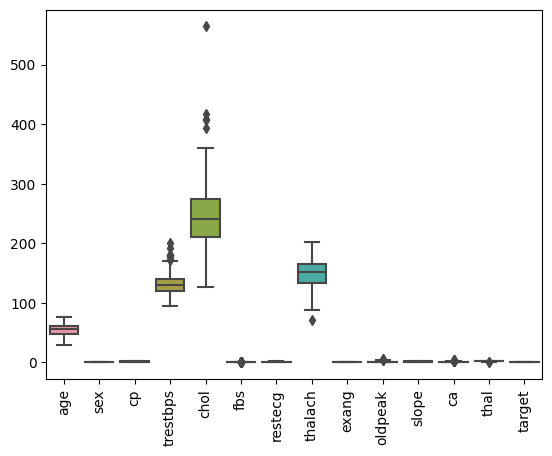

In [9]:
sns.boxplot(data = cep_df)
plt.xticks(rotation=90)
plt.show()

One outliers is very extrem, hence removing 

In [10]:
# Removing outliers

print(cep_df.shape)

cep_df = cep_df[cep_df['chol']<500]

print('##################################################')
print(cep_df.shape)

(302, 14)
##################################################
(301, 14)


###### Age

In [11]:
# General checking numbers
pd.DataFrame(cep_df['age'].value_counts()).transpose()

age,58,57,54,59,52,51,62,56,44,60,...,71,40,69,34,37,38,29,74,76,77
count,19,17,16,14,13,12,11,11,11,11,...,3,3,3,2,2,2,1,1,1,1


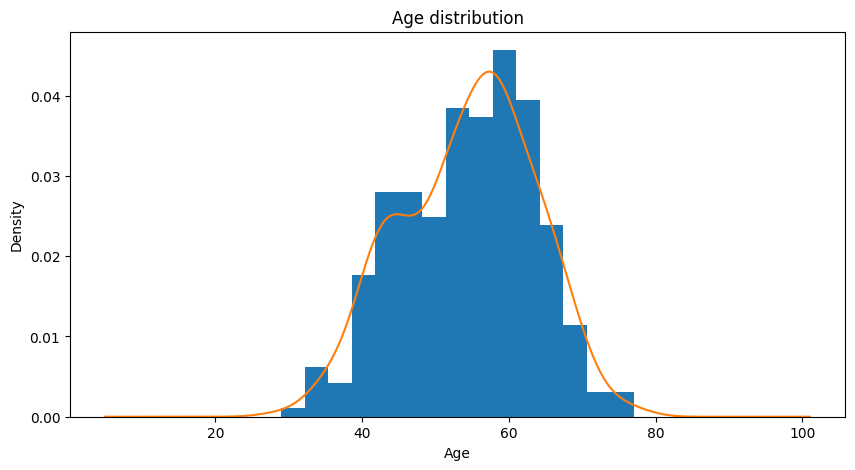

In [12]:
plt.figure(figsize=(10,5))
cep_df['age'].plot(kind = "hist", density = True, bins = 15)
cep_df['age'].plot(kind = "kde")
plt.xlabel('Age')
plt.title('Age distribution')
plt.show()

**Age is more or less normally distributed.**

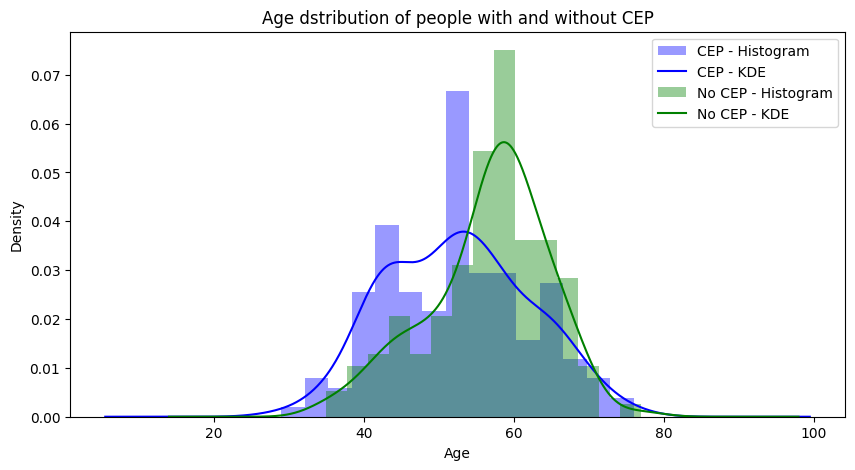

In [13]:
plt.figure(figsize=(10,5))

# with CEP
cep_df['age'][cep_df['target']==1].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='blue')
cep_df['age'][cep_df['target']==1].plot(kind = "kde",color='blue')

# No CEP
cep_df['age'][cep_df['target']==0].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='green')
cep_df['age'][cep_df['target']==0].plot(kind = "kde",color='green')

plt.legend(['CEP - Histogram', 'CEP - KDE', 'No CEP - Histogram', 'No CEP - KDE'])

plt.xlabel('Age')
plt.title('Age dstribution of people with and without CEP')
plt.show()

People with CEP - comparatively not normaly distributed
People with NO CEP - normally distributed

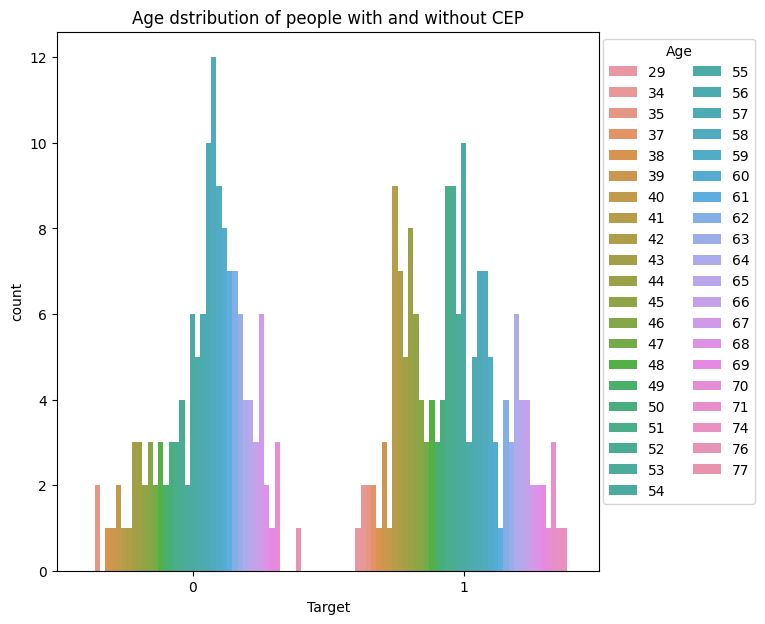

In [17]:
plt.figure(figsize=(7,7))

ax = sns.countplot(x='target',
                   hue="age", 
                   data=cep_df)

ax.legend(title='Age', loc='upper right', 
          bbox_to_anchor=(1.3, 1), 
          prop={'size': 10}, 
          ncol = 2)

plt.title('Age dstribution of people with and without CEP')
plt.xlabel('Target')
plt.show()

Distribution is aproximate to normal distribution

###### Sex

In [18]:
cep_df['sex'].value_counts()

sex
1    206
0     95
Name: count, dtype: int64

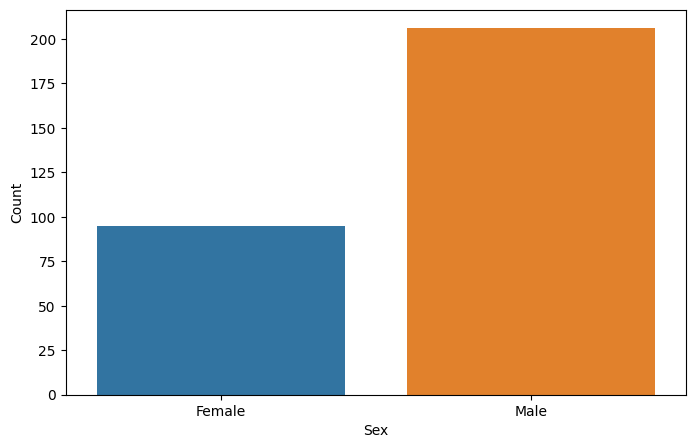

In [19]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='sex',data=cep_df)
plt.xlabel('Sex')
plt.ylabel('Count')
ax.set_xticklabels(['Female','Male'])
plt.show()

###### Other categorical variables

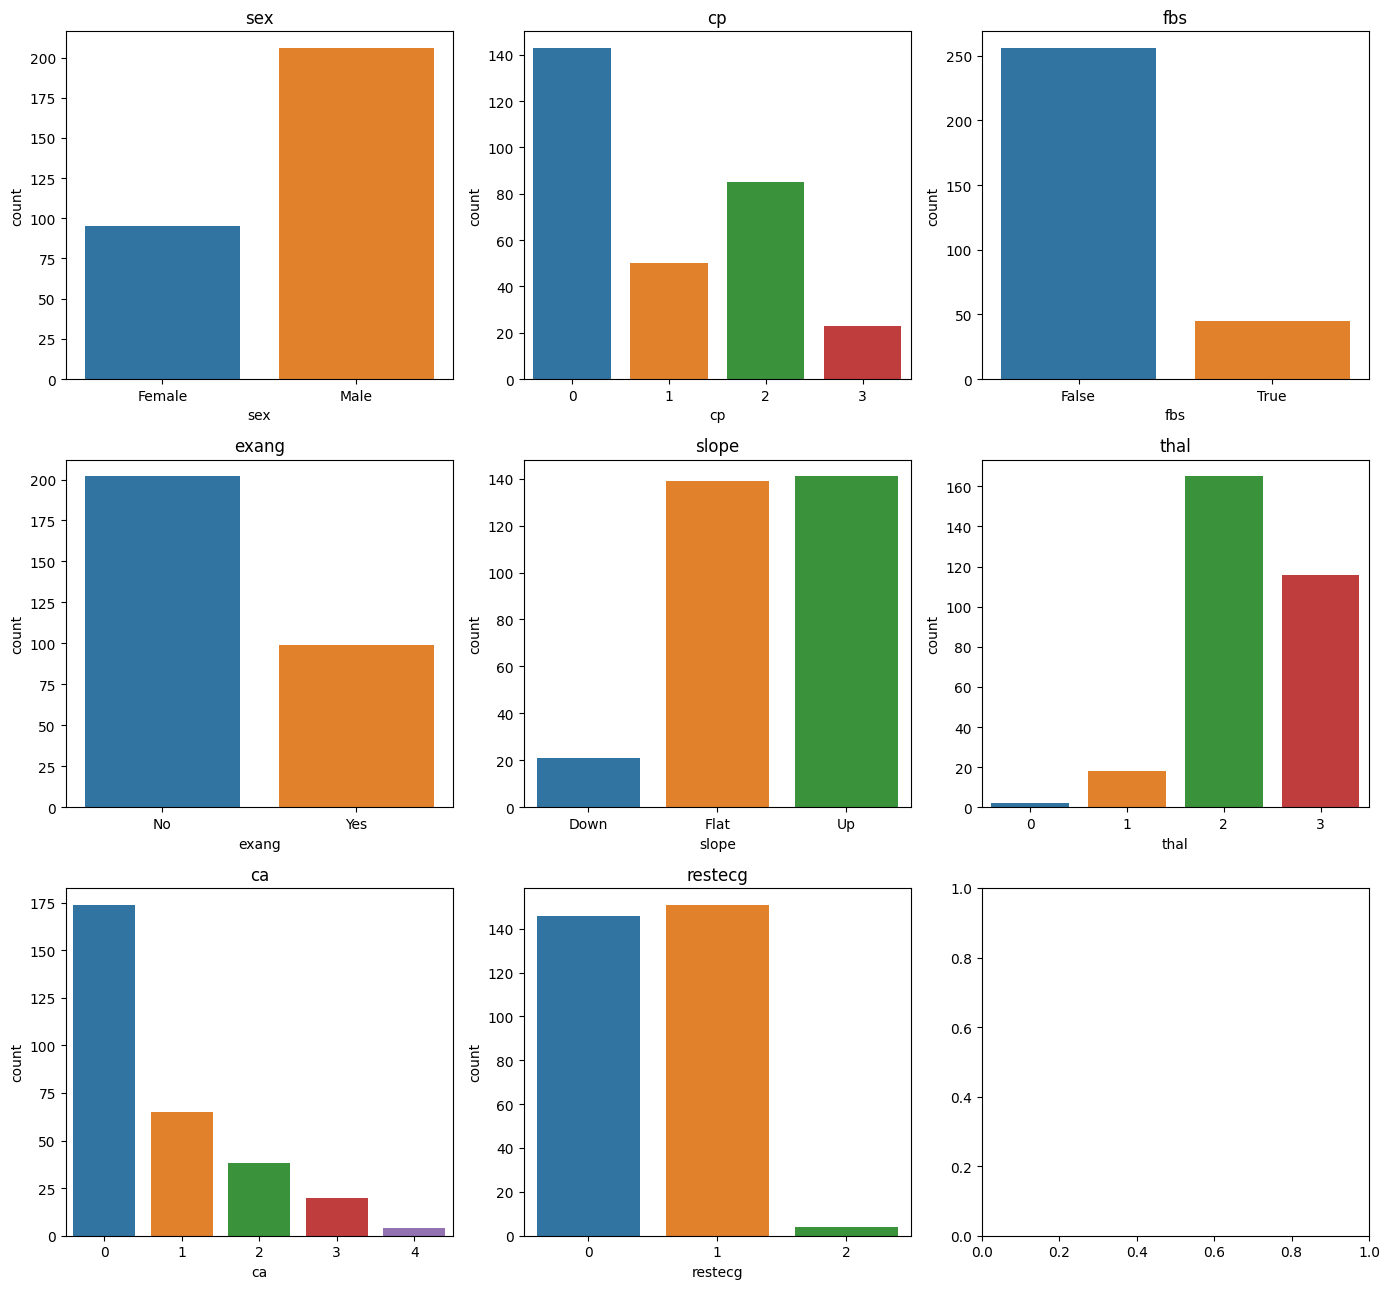

In [20]:
categorical_var = ['sex','cp','fbs','exang','slope','thal','ca','restecg']

fig, axes = plt.subplots(3, 3, figsize=(14, 13))

axes = axes.flatten() 
for ii,col in enumerate(categorical_var):
    ax = axes[ii]
    sns.countplot(data=cep_df,x=col,ax=ax)
    ax.set_title(col) 
    
    if col == 'sex':
        ax.set_xticklabels(['Female','Male'])
    elif col == 'fbs':
        ax.set_xticklabels(['False','True'])    
    elif col == 'exang':
        ax.set_xticklabels(['No','Yes'])
    elif col == 'slope':
        ax.set_xticklabels(['Down','Flat','Up']) # is it right?
        
    
plt.tight_layout()
plt.show() 

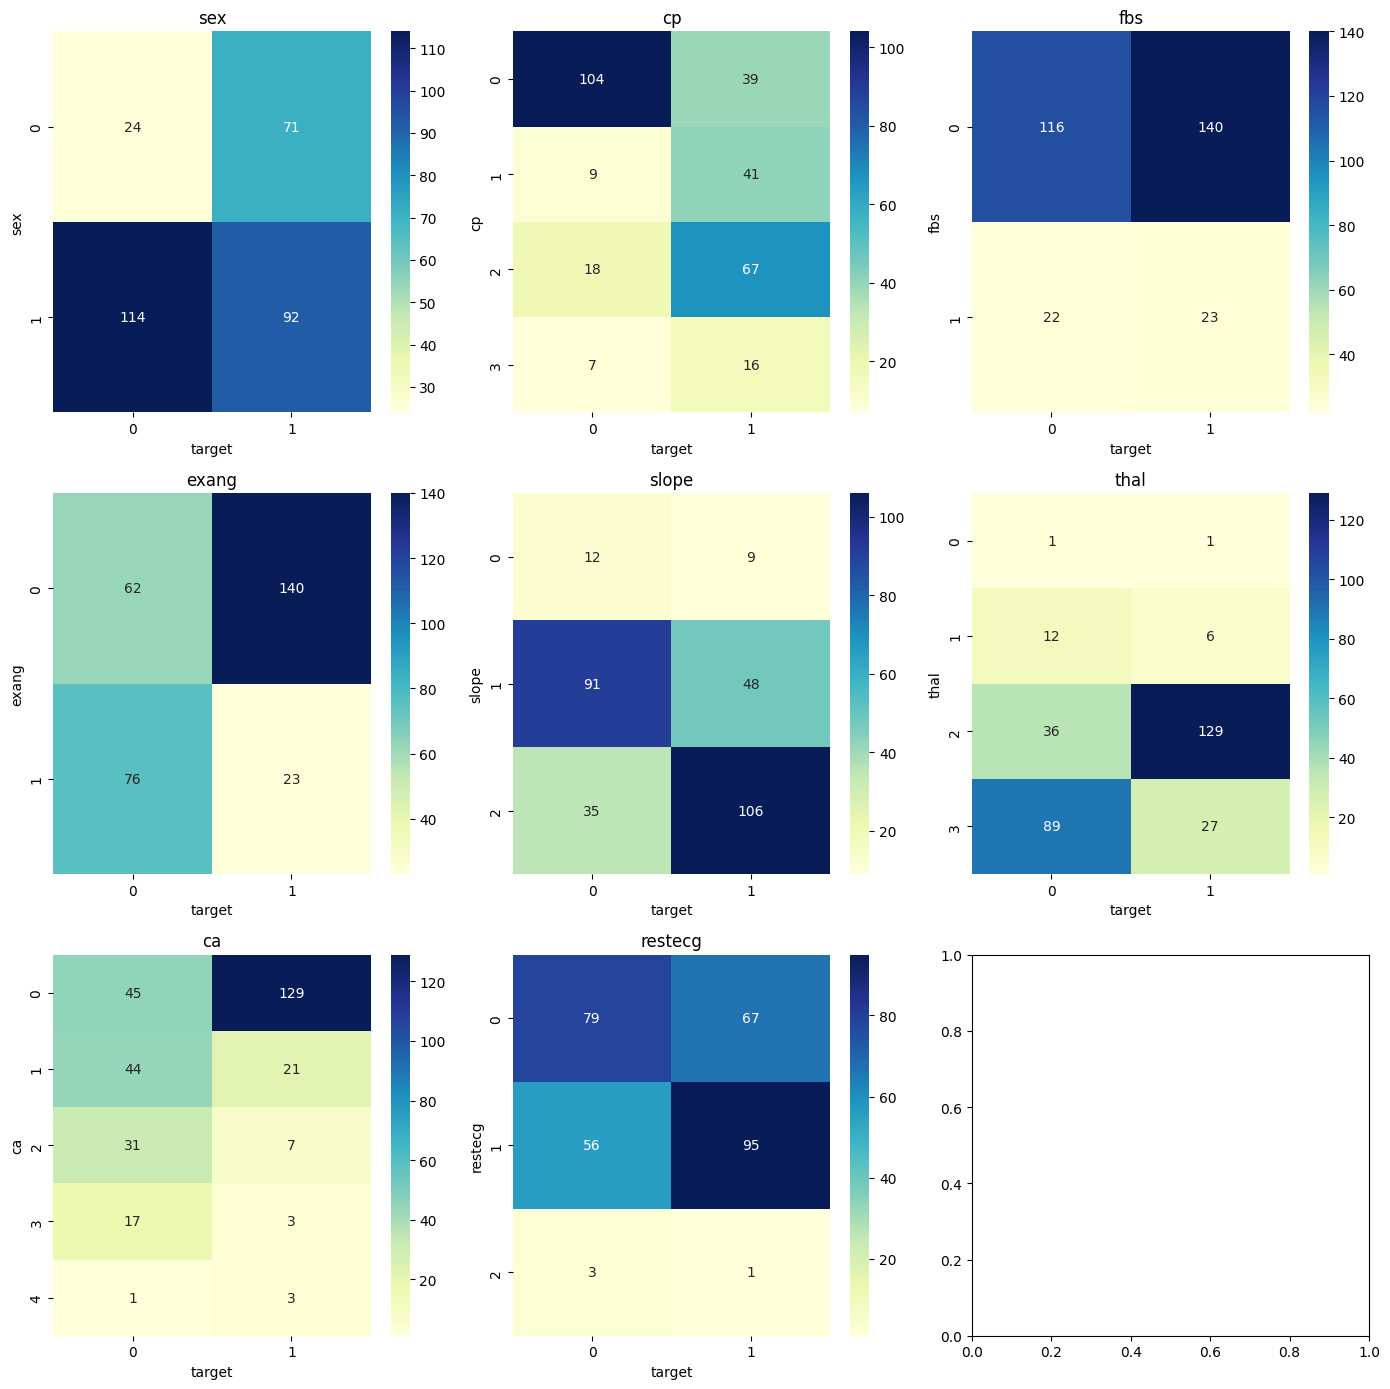

In [21]:
categorical_var = ['sex','cp','fbs','exang','slope','thal','ca','restecg']

fig, axes = plt.subplots(3, 3, figsize=(14, 14))

axes = axes.flatten()

for ii,col in enumerate(categorical_var):
    ax = axes[ii]
    
    cross_tab = pd.crosstab(cep_df[col],
                           cep_df['target'])
    
    sns.heatmap(cross_tab, cmap='YlGnBu', 
                annot=True, fmt='d', 
                cbar=True, ax=ax)
    
#     sns.countplot(data=cep_df,x=col,ax=ax)
    ax.set_title(col) 

plt.tight_layout()
plt.show()

#### continuous_var

In [22]:
continuous_var = ['age','trestbps','chol','thalach','oldpeak']

In [23]:
cep_df[continuous_var]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


<Figure size 640x480 with 0 Axes>

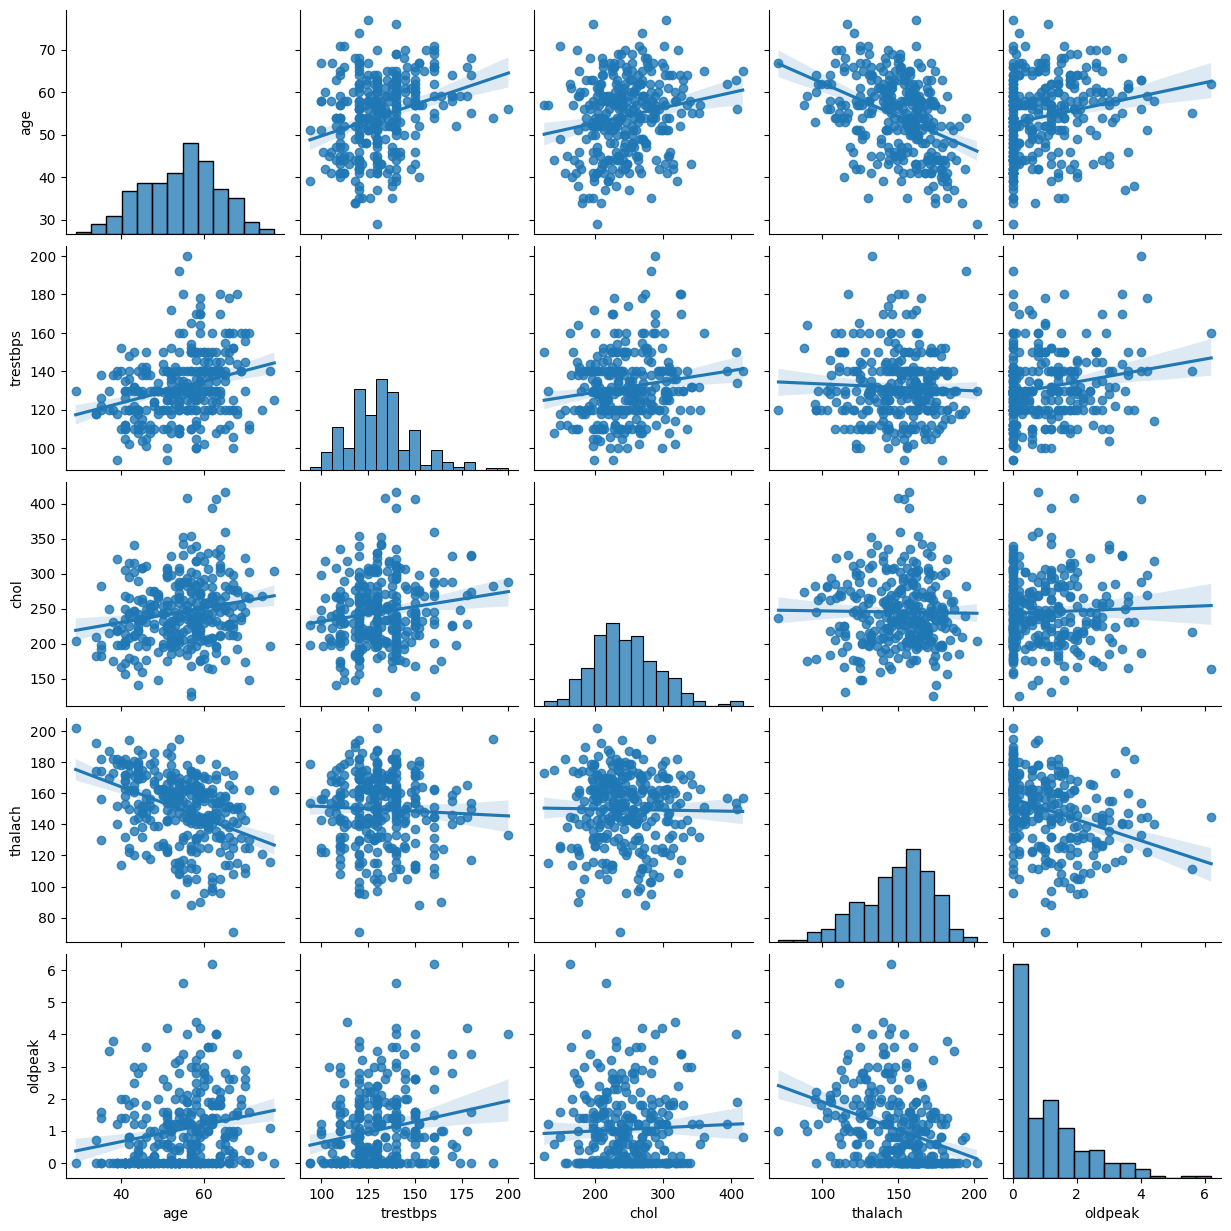

In [24]:
plt.figure()
sns.pairplot(data = cep_df[continuous_var],kind='reg', palette='husl')
plt.show()

### Variable which are correlated

In [25]:
cep_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
corelationMatrix = cep_df.corr()

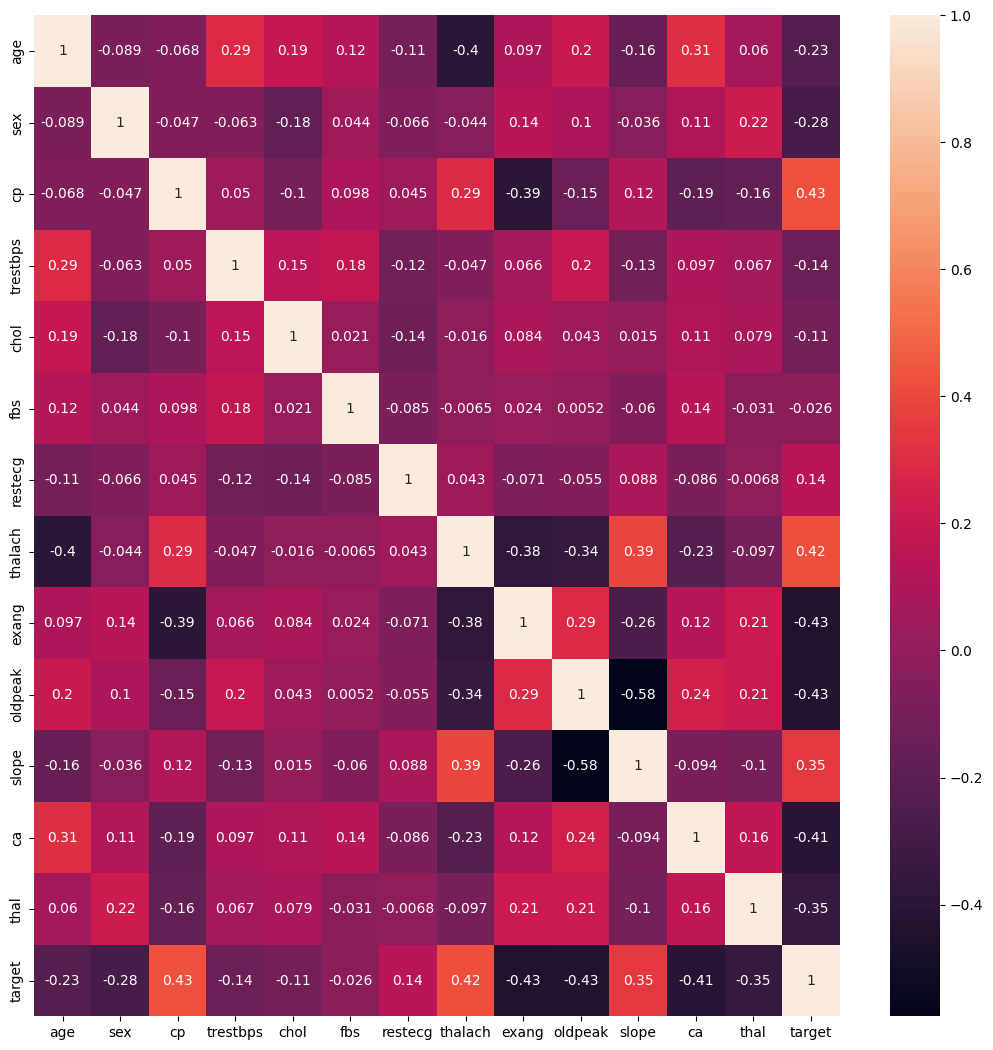

In [27]:
plt.figure(figsize=(13,13))

sns.heatmap(corelationMatrix, 
            xticklabels=corelationMatrix.columns, 
            yticklabels=corelationMatrix.columns, 
            annot=True)
plt.show()

**trestbps:**is weakly correlated with the target variable.

Moderate positive correlation with cp, thalach, slope, 
Negative correlation with exang, oldpeak,ca and thal

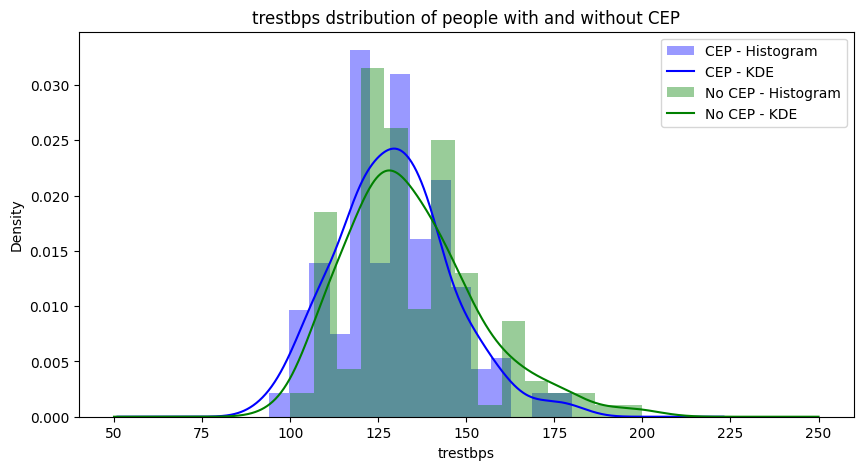

In [28]:
plt.figure(figsize=(10,5))

# with CEP
cep_df['trestbps'][cep_df['target']==1].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='blue')
cep_df['trestbps'][cep_df['target']==1].plot(kind = "kde",color='blue')

# No CEP
cep_df['trestbps'][cep_df['target']==0].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='green')
cep_df['trestbps'][cep_df['target']==0].plot(kind = "kde",color='green')

plt.legend(['CEP - Histogram', 'CEP - KDE', 'No CEP - Histogram', 'No CEP - KDE'])

plt.xlabel('trestbps')
plt.title('trestbps dstribution of people with and without CEP')
plt.show()

More or less normally distributed

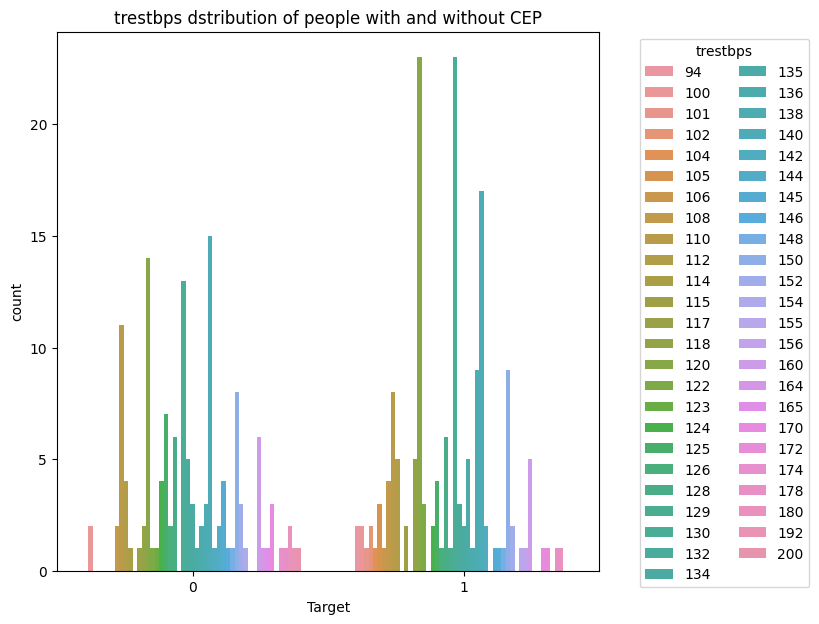

In [29]:
plt.figure(figsize=(7,7))

ax = sns.countplot(x='target',
                   hue="trestbps", 
                   data=cep_df)

ax.legend(title='trestbps', loc='upper right', 
          bbox_to_anchor=(1.4, 1), 
          prop={'size': 10}, 
          ncol = 2)

plt.title('trestbps dstribution of people with and without CEP')
plt.xlabel('Target')
plt.show()

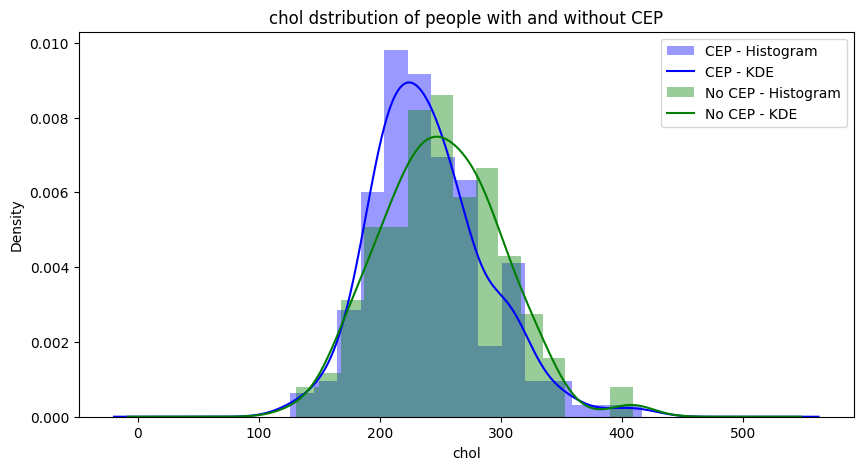

In [30]:
plt.figure(figsize=(10,5))

# with CEP
cep_df['chol'][cep_df['target']==1].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='blue')
cep_df['chol'][cep_df['target']==1].plot(kind = "kde",color='blue')

# No CEP
cep_df['chol'][cep_df['target']==0].plot(kind = "hist", density = True, bins = 15,alpha=.4,color='green')
cep_df['chol'][cep_df['target']==0].plot(kind = "kde",color='green')

plt.legend(['CEP - Histogram', 'CEP - KDE', 'No CEP - Histogram', 'No CEP - KDE'])

plt.xlabel('chol')
plt.title('chol dstribution of people with and without CEP')
plt.show()

In [31]:
# oldpeak and slop are related variable
cep_df['chol'].value_counts()

chol
204    6
197    6
234    6
254    5
269    5
      ..
224    1
167    1
276    1
353    1
131    1
Name: count, Length: 151, dtype: int64

## Model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
cep_df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 301, dtype: int64

In [34]:
Y = cep_df['target']
X = cep_df.drop(['target'],axis=1)

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

**test data size is 30%** 

## Logistic model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
x_train_lr = x_train
y_train_lr = y_train

In [39]:
lr = LogisticRegression()

In [40]:
lr

LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
print('train score:',lr.score(x_train,y_train))

train score: 0.8571428571428571


In [43]:
print('train score:',lr.score(x_test,y_test))

train score: 0.8241758241758241


In [44]:
prediction_train_lr = lr.predict(x_train)
prediction_test_lr = lr.predict(x_test)

In [45]:
prediction_train_lr

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
prediction_test_lr

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [47]:
pd.crosstab(y_train,prediction_train_lr)

col_0,0,1
target,,
0,74,20
1,10,106


In [48]:
pd.crosstab(y_test,prediction_test_lr)

col_0,0,1
target,,
0,36,8
1,8,39


In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_train,prediction_train_lr)

0.8412698412698413

In [51]:
recall_score(y_train,prediction_train_lr)

0.9137931034482759

?? plot decision boundry

In [85]:
from mlxtend.plotting import plot_decision_regions

## Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(n_estimators=700,n_jobs=-1,verbose=True)

In [60]:
rfc.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    2.3s finished


RandomForestClassifier(n_estimators=700, n_jobs=-1, verbose=True)

In [61]:
predict_rfc = rfc.predict(x_test)
predict_rfc

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [62]:
rfc.score(x_test,y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 700 out of 700 | elapsed:    0.1s finished


0.8241758241758241

In [63]:
pd.crosstab(y_test,predict_rfc)

col_0,0,1
target,,
0,35,9
1,7,40


In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



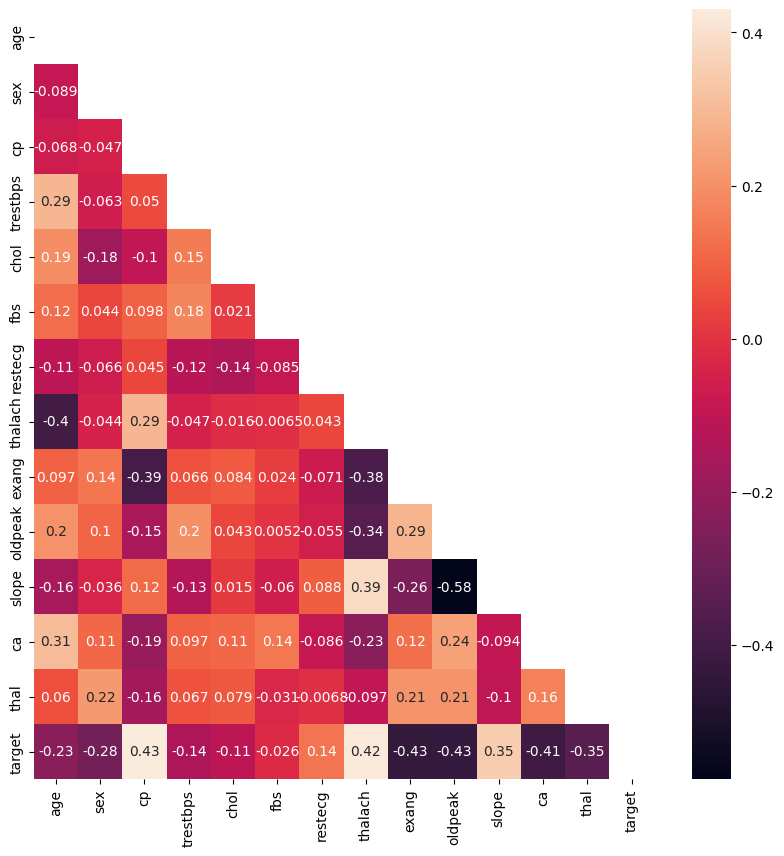

In [66]:
plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(corelationMatrix, dtype=bool))

sns.heatmap(corelationMatrix,
            xticklabels=corelationMatrix.columns,
            yticklabels=corelationMatrix.columns,
            annot=True,
            mask=mask)  # Apply the mask to the heatmap

plt.show()

In [67]:
import statsmodels.api as sm

In [68]:
x_train_with_const = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.350984
         Iterations 7


In [69]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.4896
Time:                        14:37:55   Log-Likelihood:                -73.707
converged:                       True   LL-Null:                       -144.41
Covariance Type:            nonrobust   LLR p-value:                 1.103e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9094      3.192      1.225      0.221      -2.346      10.165
age           -0.0170      0.029     -0.590      0.555      -0.074       0.040
sex           -1.5357      0.534     -2.874      0.0

In [70]:
x_test_with_const = sm.add_constant(x_test)
logit_model = sm.Logit(y_test, x_test_with_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.263361
         Iterations 9


In [71]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   91
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.6198
Time:                        14:38:05   Log-Likelihood:                -23.966
converged:                       True   LL-Null:                       -63.027
Covariance Type:            nonrobust   LLR p-value:                 2.485e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6876      6.422     -0.107      0.915     -13.275      11.900
age            0.0693      0.066      1.055      0.292      -0.059       0.198
sex           -2.6190      1.299     -2.016      0.0